<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_51_Academic_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.15.0
4422102/4422102 [==============================] - 0s 0us/step


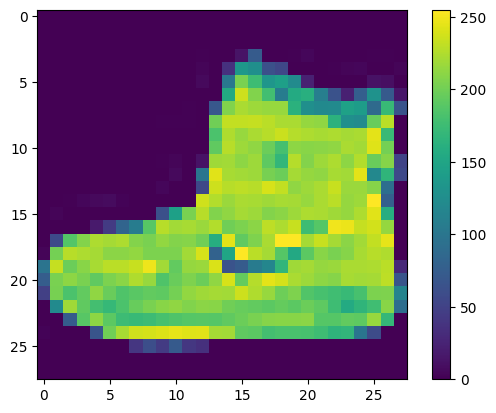

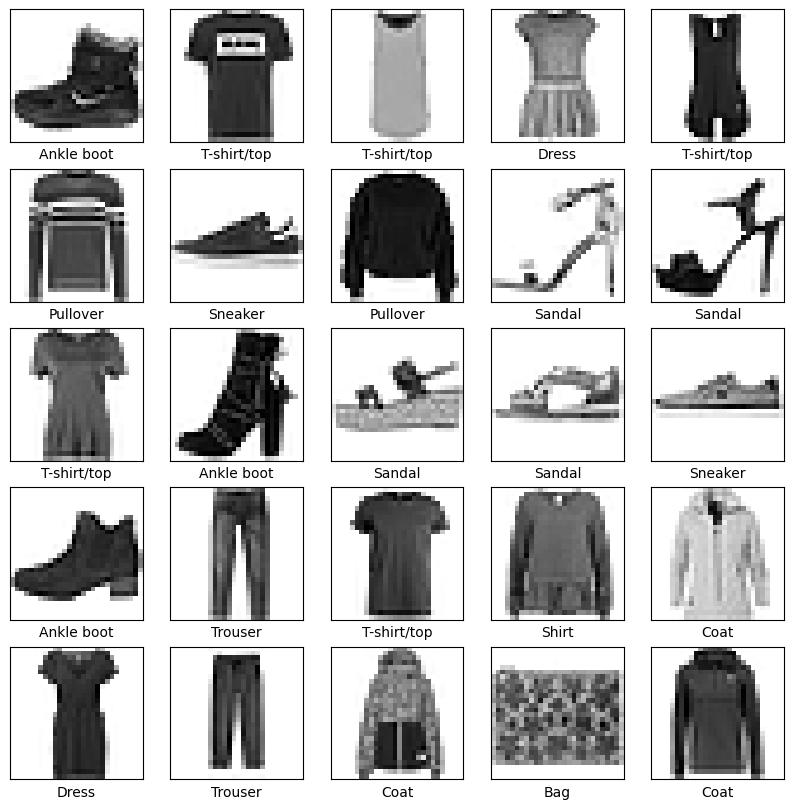

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5009 - accuracy: 0.8252
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8666
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8774
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8852
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8916
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2794 - accuracy: 0.8966
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.8996
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2479 - accuracy: 0.9073
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

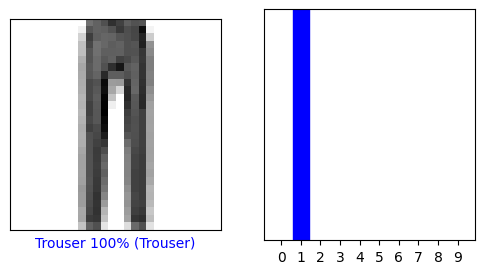

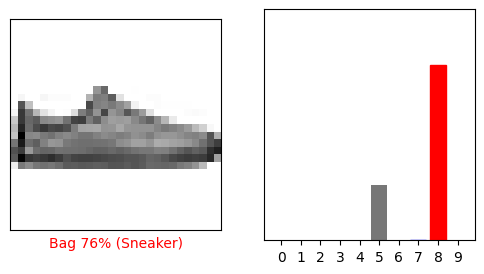

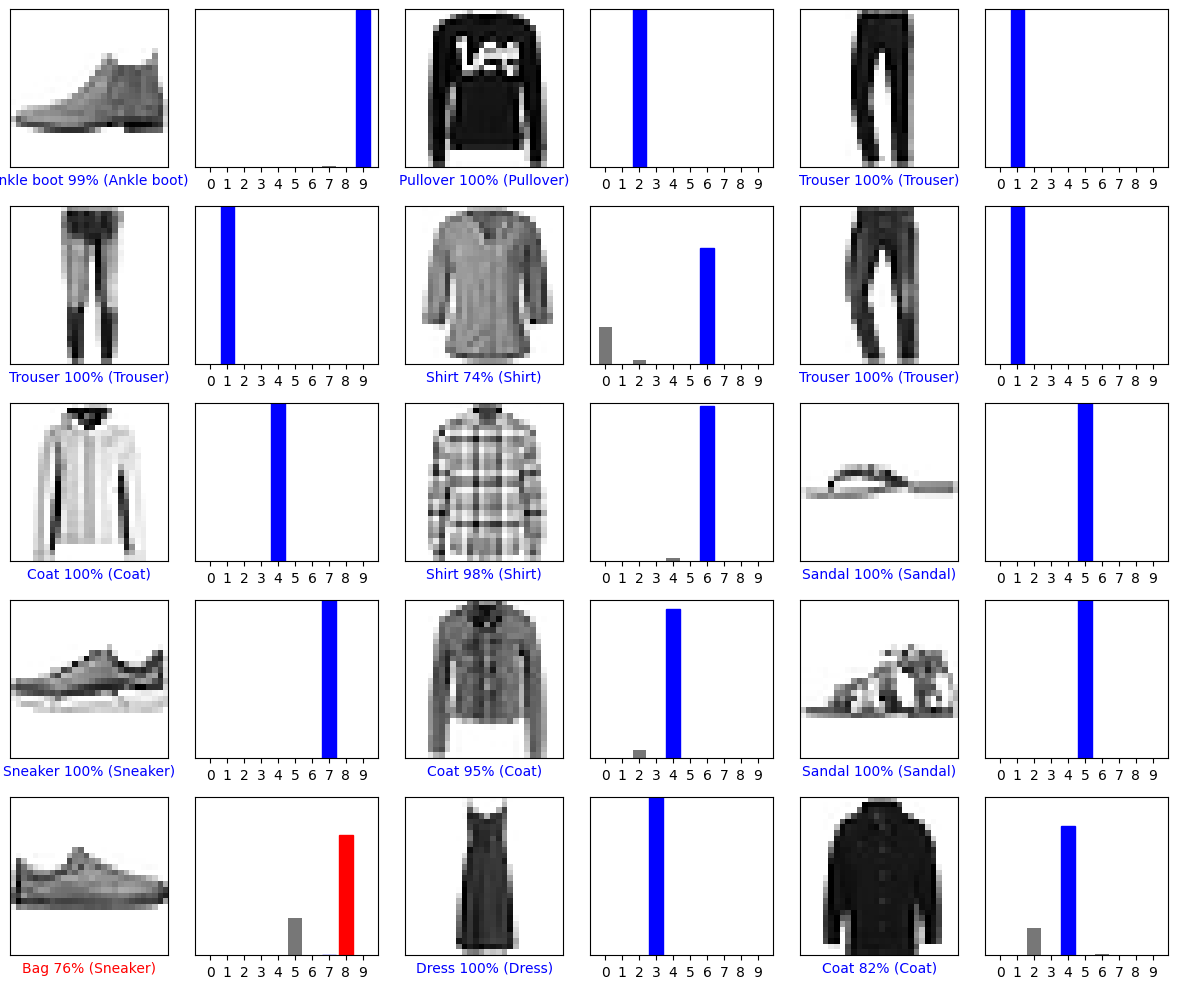

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 14ms/step
[[6.2342770e-05 1.7121521e-12 9.9802148e-01 2.4003627e-10 1.8541168e-03
  1.6500171e-14 6.2056912e-05 4.2856797e-16 2.4288241e-10 2.4798489e-17]]
Dimensiones de la imagen de entrada antes de la adaptación: (1, 28, 28, 1)
1/1 [==============================] - 0s 40ms/step
La prenda en la imagen es de tipo: Dress
Probabilidad: 0.9984212


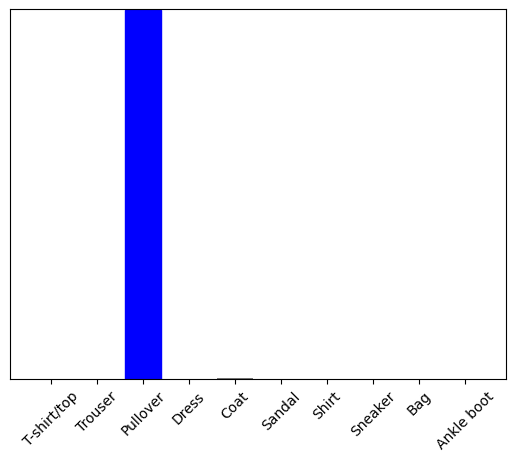

In [1]:
# -*- coding: utf-8 -*-
"""Aula_28_ESTUDIO_MARZO_24.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1XT7Ni1X44JcvZag_x0V5Penry8Z1WSOy
"""

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np


print(tf.__version__)
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
predictions = model.predict(test_images)
np.argmax(predictions[0])
test_labels[0]
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])
# Guardar el modelo en un archivo .h5
#model.save('/home/margarito/python/HILARIO-modelo.h5')



#************************************************************************************

# Cargar la imagen de la prenda y redimensionarla
imagen_ruta = '/content/drive/MyDrive/aguila.jpg'
img = image.load_img(imagen_ruta, target_size=(28, 28), color_mode='grayscale')  # Cambia a escala de grises
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Imprimir las dimensiones de la imagen antes de la adaptación
print("Dimensiones de la imagen de entrada antes de la adaptación:", img_array.shape)

# Hacer la predicción
prediccion = model.predict(img_array)

# Decodificar la salida para obtener la clase predicha
clase_predicha = np.argmax(prediccion)
probabilidad_prediccion = np.max(prediccion)

# Imprimir la clase predicha y la probabilidad
# Decodificar la salida para obtener la clase predicha
clase_predicha = np.argmax(prediccion)
probabilidad_prediccion = np.max(prediccion)

# Imprimir la clase predicha y la probabilidad
print("La prenda en la imagen es de tipo:", class_names[clase_predicha])
print("Probabilidad:", probabilidad_prediccion)